In [254]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
path = r'C:\Users\Administrator\Desktop\Data Science project\archive\UEFA Champions League 2016-2022 Data.xlsx'

In [256]:
goals = pd.read_excel(path, sheet_name = 'goals')
managers = pd.read_excel(path, sheet_name = 'managers')
matches = pd.read_excel(path, sheet_name = 'matches')
players = pd.read_excel(path, sheet_name = 'players')
stadiums = pd.read_excel(path, sheet_name = 'stadiums')
teams = pd.read_excel(path, sheet_name = 'teams')

In [257]:
# function for changing columns to lower case
def lower(df):
    df.columns = df.columns.str.lower()
    return df

In [258]:
# Applying function for every dataframe
goal = lower(goals)
match = lower(matches)
stadium = lower(stadiums)
player = lower(players)
manager = lower(managers)
team = lower(teams)

In [259]:
matches['result'] = 'D'  # Set default value as 'D' (draw)

# Update result based on home_team_score and away_team_score
matches.loc[matches['home_team_score'] > matches['away_team_score'], 'result'] = 'W'
matches.loc[matches['home_team_score'] < matches['away_team_score'], 'result'] = 'L'


In [260]:
matches['season'] = matches['season'].apply(lambda x: int(x.split('-')[0]))

In [261]:
match["date_time"] = pd.to_datetime(match["date_time"], format="%d-%b-%y %I.%M.%S.%f000000 %p")

In [262]:
matches.rename(columns={'home_team': 'team', 'away_team': 'opponent'}, inplace=True)


In [263]:
matches['opp_code'] = matches['opponent'].astype("category").cat.codes

In [264]:
matches["day_code"]=matches["date_time"].dt.dayofweek

In [265]:
matches['venue_code'] = np.where(matches['team']==matches['team'], 1, 0)


In [266]:
matches["target"] = matches["result"].map({"W": 1, "L": 2, "D": 0}).astype("int")


In [319]:
matches["result"].value_counts("W")

W    0.439516
L    0.346774
D    0.213710
Name: result, dtype: float64

In [304]:
matches.dtypes

match_id                     object
season                        int64
date_time            datetime64[ns]
team                         object
opponent                     object
stadium                      object
home_team_score               int64
away_team_score               int64
penalty_shoot_out             int64
attendance                    int64
result                       object
opp_code                       int8
day_code                      int64
venue_code                    int32
target                        int32
dtype: object

In [306]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)

In [307]:
train=matches[matches["date_time"]< '2020-01-01']

In [308]:
test=matches[matches["date_time"]> '2020-01-01']

In [309]:
predictors= ["venue_code", "opp_code", "day_code"]
predictors

['venue_code', 'opp_code', 'day_code']

In [310]:
lr.fit(train[predictors], train["target"])

LogisticRegression(max_iter=500)

In [311]:
# Make predictions on the test set
preds = lr.predict(test[predictors])

In [312]:
from sklearn.metrics import accuracy_score
# Evaluate the model's accuracy
accuracy = accuracy_score(test["target"], preds)
print("Accuracy:", accuracy)

Accuracy: 0.43223443223443225


In [313]:
result_df = pd.concat([test['target'], pd.Series(preds, name='predicted', index=test.index)], axis=1)
print(result_df)

     target  predicted
0         1          1
1         0          1
2         1          1
3         2          1
4         2          1
..      ...        ...
364       2          1
365       2          1
366       2          1
367       2          1
368       2          1

[273 rows x 2 columns]


In [314]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(test["target"], preds)
print(cm)

[[  0  51   0]
 [  0 118   0]
 [  0 104   0]]


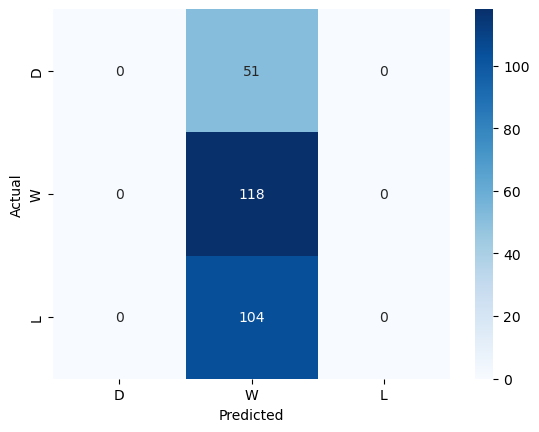

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["D", "W", "L"], yticklabels=["D", "W", "L"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [316]:
combined=pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [317]:
pd.crosstab(index=combined["actual"], columns= combined["prediction"])

prediction,1
actual,
0,51
1,118
2,104


In [305]:
from sklearn.metrics import precision_score

precision = precision_score(test["target"], preds, average='weighted', zero_division=1)
print("Precision Score: {:.2f}".format(precision))

Precision Score: 0.75


In [318]:
from sklearn.metrics import f1_score

f1 = f1_score(test["target"], preds, average='weighted')
print("F1 Score: {:.2f}".format(f1))



F1 Score: 0.26
